In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pth_one_layer = "1_layer/err_arr.json"
pth_two_layer = "2_layer/err_arr.json"

err_one_layer = json.load(open(pth_one_layer, "r"))
err_two_layer = json.load(open(pth_two_layer, "r"))

In [3]:
def fetch_err_rates(err):
    n = len(err)
    epochs = np.zeros(n)
    id_errs = np.zeros(n)
    ood_errs = np.zeros(n)

    for i, d in enumerate(err):
        epochs[i] = d["epoch"]
        id_errs[i] = d["err_test"]
        ood_errs[i] = d["err_ood"]
    return epochs, id_errs, ood_errs


epochs_one_layer, id_errs_one_layer, ood_errs_one_layer = fetch_err_rates(err_one_layer)
epochs_two_layer, id_errs_two_layer, ood_errs_two_layer = fetch_err_rates(err_two_layer)

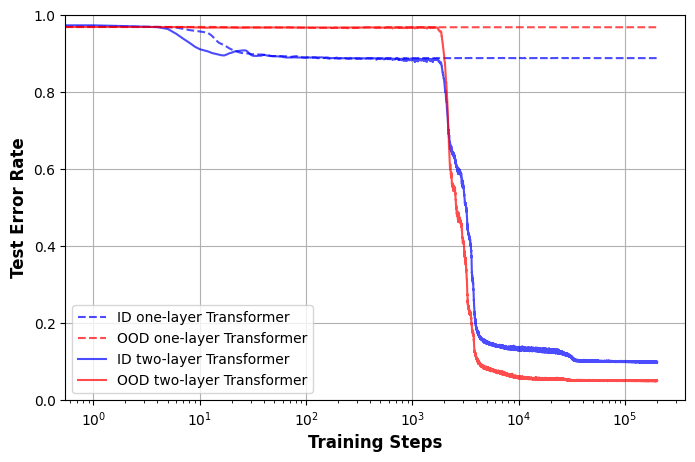

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(
    epochs_one_layer,
    id_errs_one_layer,
    label="ID one-layer Transformer",
    linestyle="dashed",
    color="blue",
    alpha=0.7,
)
plt.plot(
    epochs_one_layer,
    ood_errs_one_layer,
    label="OOD one-layer Transformer",
    linestyle="dashed",
    color="red",
    alpha=0.7,
)
plt.plot(
    epochs_one_layer,
    id_errs_two_layer,
    label="ID two-layer Transformer",
    color="blue",
    alpha=0.7,
)
plt.plot(
    epochs_one_layer,
    ood_errs_two_layer,
    label="OOD two-layer Transformer",
    color="red",
    alpha=0.7,
)

plt.xscale("log")
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.xlabel("Training Steps", weight="bold", fontsize=12)
plt.ylabel("Test Error Rate", weight="bold", fontsize=12)
pass

# Larger Vocab = 64

In [5]:
pth_one_layer = "1_layer_64_vocab/err_arr.json"
pth_two_layer = "2_layer_64_vocab/err_arr.json"

err_one_layer = json.load(open(pth_one_layer, "r"))
err_two_layer = json.load(open(pth_two_layer, "r"))

epochs_one_layer, id_errs_one_layer, ood_errs_one_layer = fetch_err_rates(err_one_layer)
epochs_two_layer, id_errs_two_layer, ood_errs_two_layer = fetch_err_rates(err_two_layer)

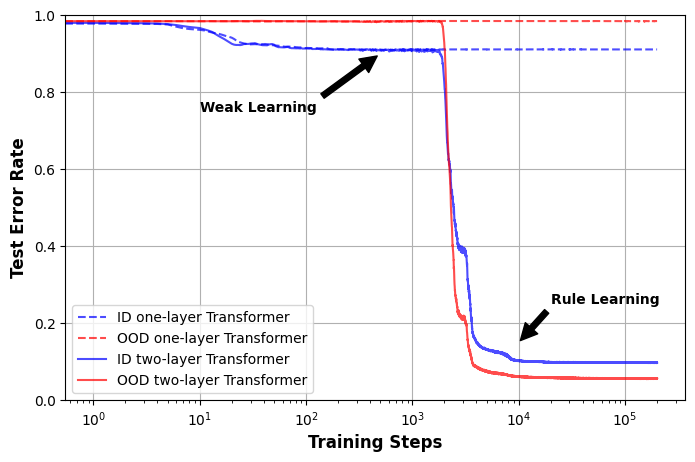

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(
    epochs_one_layer,
    id_errs_one_layer,
    label="ID one-layer Transformer",
    linestyle="dashed",
    color="blue",
    alpha=0.7,
)
plt.plot(
    epochs_one_layer,
    ood_errs_one_layer,
    label="OOD one-layer Transformer",
    linestyle="dashed",
    color="red",
    alpha=0.7,
)
plt.plot(
    epochs_one_layer,
    id_errs_two_layer,
    label="ID two-layer Transformer",
    color="blue",
    alpha=0.7,
)
plt.plot(
    epochs_one_layer,
    ood_errs_two_layer,
    label="OOD two-layer Transformer",
    color="red",
    alpha=0.7,
)

plt.xscale("log")
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.xlabel("Training Steps", weight="bold", fontsize=12)
plt.ylabel("Test Error Rate", weight="bold", fontsize=12)


# Adding annotation with an arrow
weak_px, weak_py, weak_tx, weak_ty = 500, 0.9, 10, 0.75
plt.annotate(
    "Weak Learning",  # Text to display
    xy=(weak_px, weak_py),  # Point to annotate
    xytext=(weak_tx, weak_ty),  # Text location
    arrowprops=dict(facecolor="black", shrink=0.05),  # Arrow properties
    fontsize=10,
    fontweight="bold",
)

rule_px, rule_py, rule_tx, rule_ty = 10**4, 0.15, 2 * (10**4), 0.25
plt.annotate(
    "Rule Learning",  # Text to display
    xy=(rule_px, rule_py),  # Point to annotate
    xytext=(rule_tx, rule_ty),  # Text location
    arrowprops=dict(facecolor="black", shrink=0.05),  # Arrow properties
    fontsize=10,
    fontweight="bold",
)

plt.savefig("Figure_1.png")
pass